# Exploratory Data Analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that has occured in two days, where we have 492 frauds out of 2,84,807 transactions. The dataset is highly imbalanced.**

**Note:**It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, we cannot have the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
fraud = round(len(df[df['Class']==1])/ len(df)*100,2)
nofraud = round(len(df[df['Class']==0])/ len(df)*100,2)

print("No fraud transaction are:",str(nofraud)+'%',"of the dataset")
print("Fraud transaction are:",str(fraud)+'%',"of the dataset")

No fraud transaction are: 99.83% of the dataset
Fraud transaction are: 0.17% of the dataset


# Data Analysis


**To start our data analysis, we are going to do univariate and bivariate analysis.**

Text(0.5, 1.0, '0: Non-fraudulent  1: Fradulent')

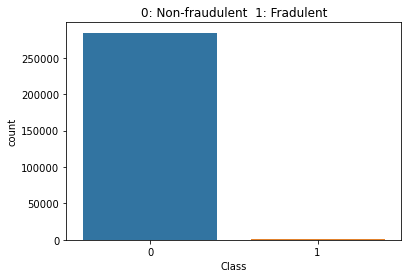

In [9]:
sns.countplot(x='Class',data=df)
plt.title("0: Non-fraudulent  1: Fradulent")

We can see our class variable is highly imbalance as we already know.

Text(0.5, 1.0, 'Distribution of Amount')

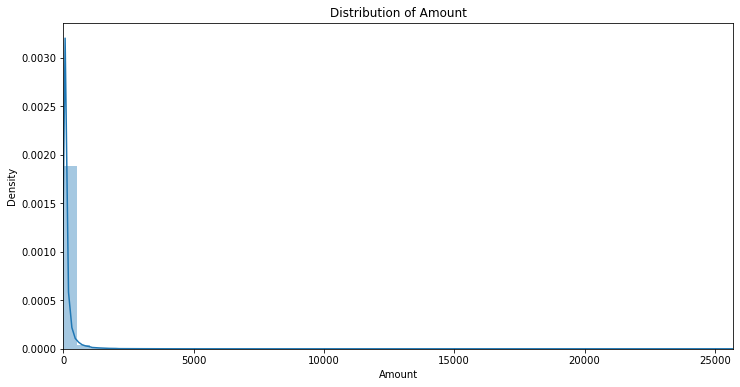

In [10]:
amount_val = df['Amount'].values
plt.figure(figsize=(12,6))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val), max(amount_val))
plt.title("Distribution of Amount")

The amount variable is mostly dense around the smaller amount regions.

Text(0.5, 1.0, 'Distribution of transaction time')

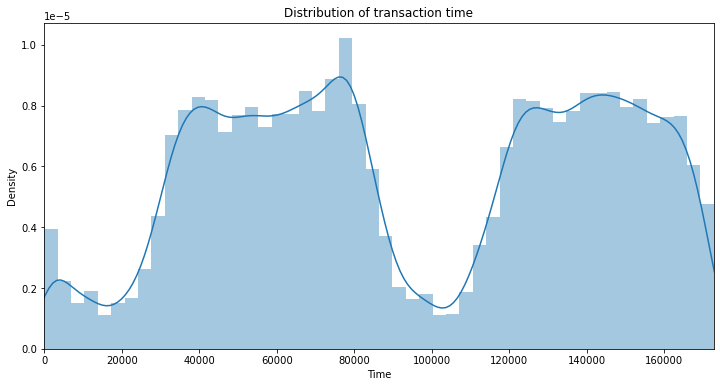

In [11]:
time_val = df['Time'].values
plt.figure(figsize=(12,6))
sns.distplot(df['Time'])
plt.xlim(min(time_val),max(time_val))
plt.title("Distribution of transaction time")

Time has **Binomial Distribution** i.e. the peak rises and falls down and again rises. The fall might happen due to night time.

Text(0.5, 1.0, 'Amount vs Class')

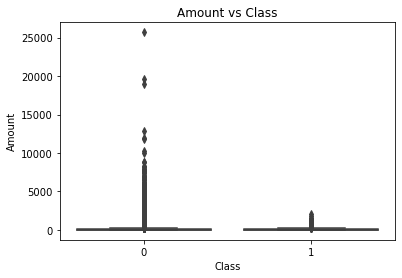

In [12]:
sns.boxplot(x='Class', y='Amount', data = df)
plt.title("Amount vs Class")

It can be clearly observed that there are very less data points having amount greater than 10,000(all in non-fraudulent category), hence we can exclude them from our dataset.

In [13]:
#Excluding the amount > 10000
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0.5, 1.0, 'Amount vs Class')

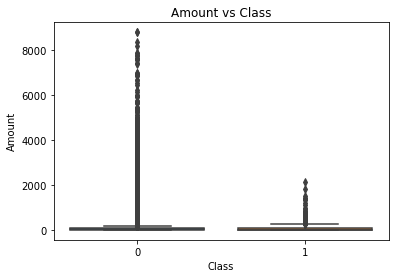

In [14]:
sns.boxplot(x='Class', y='Amount', data = df)
plt.title("Amount vs Class")

**Add "Time_min"(minute) and "Time_hour"(hour) column to our data to see it we can get some more insights.**

In [15]:
data_new = df
timedelta = pd.to_timedelta(data_new['Time'], unit='s')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

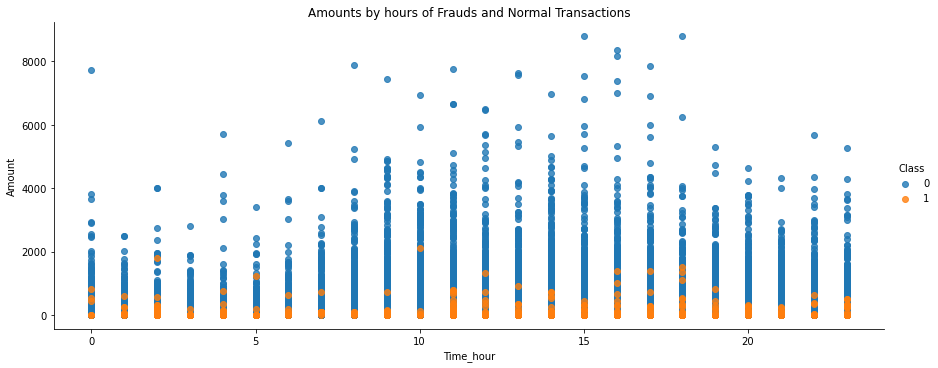

In [16]:
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)

Transactions show a more non uniform distributions across Time_hour which make sense but still we see no particular pattern to distinguish fraud and non-fraud from this analysis, Non-fraud volumns are more on active hours compared to lean hours. 

(-1.0, 25.0)

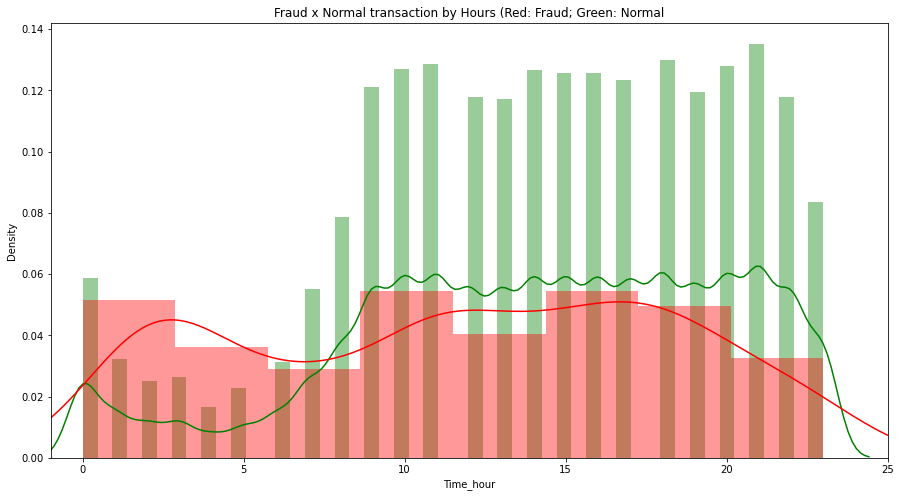

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(data_new[data_new['Class']==0]['Time_hour'],color='g')
sns.distplot(data_new[data_new['Class']==1]['Time_hour'],color='r')
plt.title('Fraud x Normal transaction by Hours (Red: Fraud; Green: Normal',fontsize=12)
plt.xlim([-1,25])

Outcome: Fraud transactions are much more uniform across the day.

**Conclusions from EDA**

1. The data consisted of around 2,85,000 data points, 30 features including time and amount, and the labeled class of whether a transaction is actually fraud or not. 
2. There were no null values present in the original dataset but the data was highly skewed with 99.83% of the data points being non-fraudulent transactions.
3. The time feature had a bimodal distribution i.e. peaks falling and rising. I have concluded that the peaks might fall due to lesser transactions during nighttime.
4. Very small proportion of transactions had amounts > 10,000 hence they were eliminated from the dataset.
5. Most of the fraudulent transactions were of small amounts (<1000 units - since we don’t know about the units about the currency).
6. The occurrence of fraudulent transactions was independent of the time of the day.

# Data Preprocessing

We are going to scale our amount data using RobustScaler. RobustScaler keeps the outlier where it has to be, away from the mean and median.

In [18]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'],axis=1,inplace=True)

In [19]:
df.drop(['Time_min','Time_hour'],axis=1,inplace=True)

In [20]:
#inserting these scaled columns at 0,1
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'],axis=1,inplace=True)
df.insert(0,'scaled_amount',scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**Splitting the Dataset**

Splitting the dataset is the first step to model training and here we are using StraitifiedKFold, it maintains the class distribution in training as well as testing data which is must needed in imbalance distribution like ours.

In [21]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits =5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Converting them into an array.
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#check if both train and test distributions are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest,return_counts=True)

print(" ")
print("Label dstributions: \n")
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))


Train: [ 30442  30473  30496 ... 284796 284797 284798] Test: [    0     1     2 ... 57016 57017 57018]
Train: [     0      1      2 ... 284796 284797 284798] Test: [ 30442  30473  30496 ... 113962 113963 113964]
Train: [     0      1      2 ... 284796 284797 284798] Test: [ 80757  81183  81606 ... 170942 170943 170944]
Train: [     0      1      2 ... 284796 284797 284798] Test: [150644 150651 150657 ... 227860 227861 227862]
Train: [     0      1      2 ... 227860 227861 227862] Test: [212511 212639 213087 ... 284796 284797 284798]
 
Label dstributions: 

[0.99827072 0.00172928]
[0.99827946 0.00172054]


**UNDERSAMPLING TO MAKE THE DATASET BALANCED**

Since, our classes are highly skewed, we have to make them equivalent in occurence to have a normal distribution of the classes.

In [22]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
60134,1.109838,-1.188943,0.313857,0.976145,-1.591745,-0.536846,-0.462554,0.189348,0.468015,-1.750863,...,0.248405,0.106510,-0.138511,-0.097370,-0.079290,0.564725,-0.384629,-0.119978,-0.013512,0
263324,1.469257,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,0.319576,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,1
124779,-0.247345,-1.842392,2.074981,-0.685011,-0.239951,-0.225557,-0.378042,-0.213178,1.310120,-0.567030,...,-0.032366,0.052323,0.054829,-0.017197,-0.753773,-0.059488,0.371427,0.200979,0.106257,0
42674,-0.286193,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1
192687,3.551845,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.361169,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,1


In [23]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


# Correlation Heat Map

Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

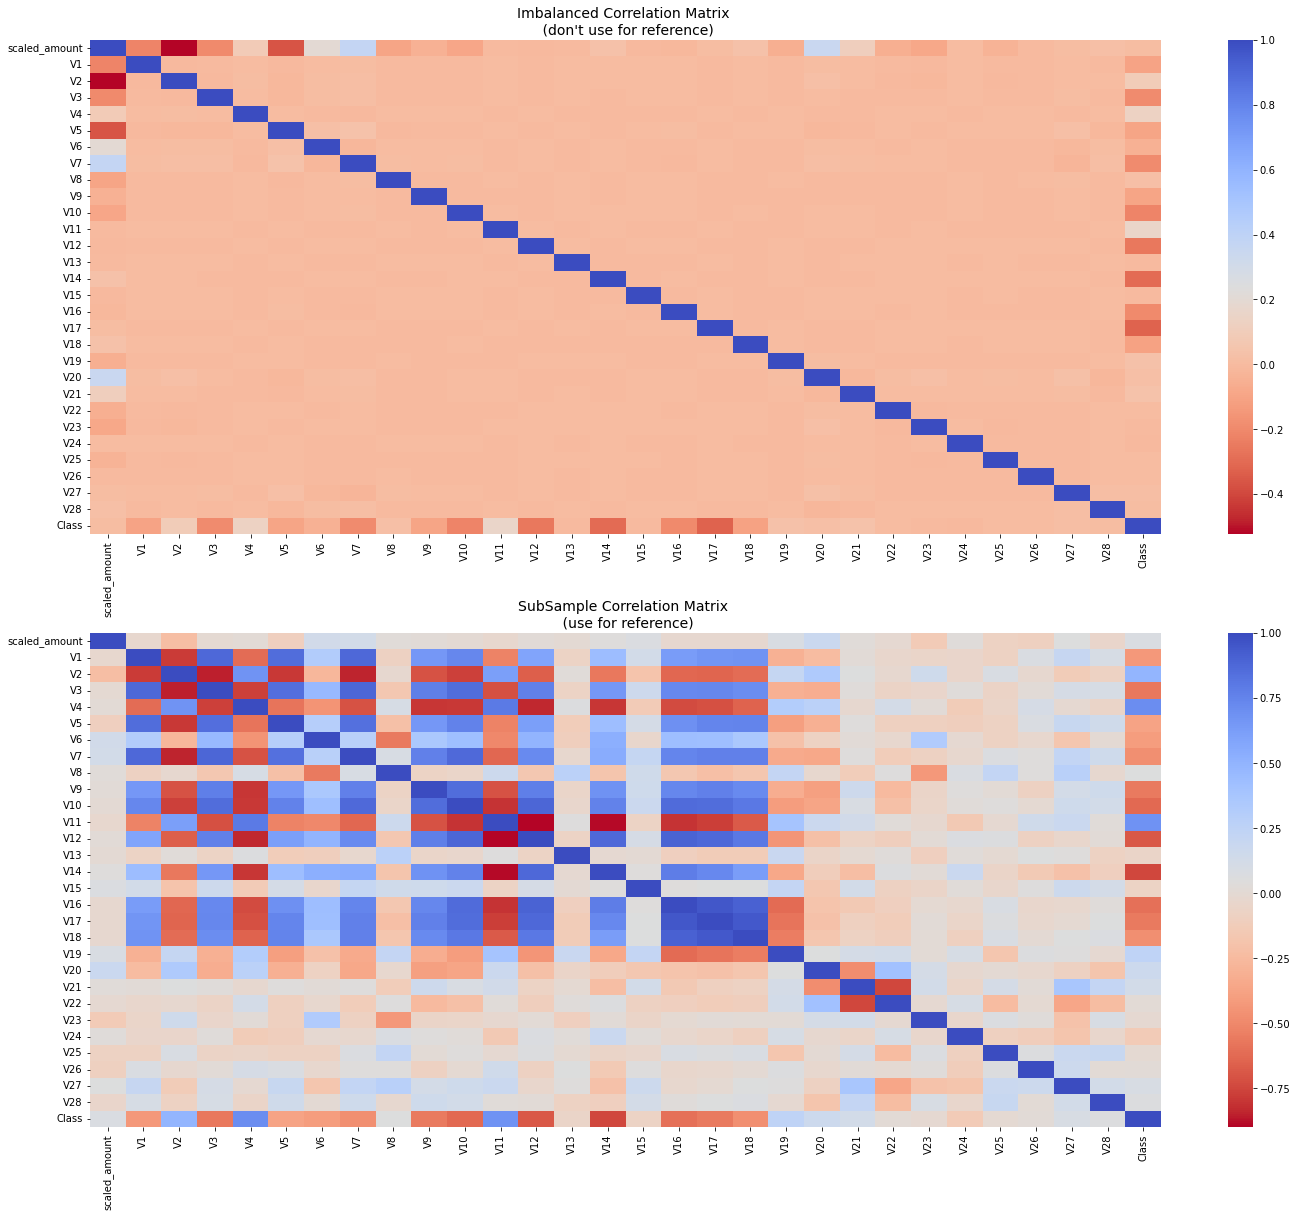

In [24]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

#Compairing correlation between the dataset.
#Entire DataFrame

corr = df.corr()
sns.heatmap(corr,cmap="coolwarm_r", annot_kws = {'size':20}, ax = ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# new_df
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

**DETECTING OUTLIERS**

In [25]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class < -0.6]['Class']

V10   -0.625575
V12   -0.684434
V14   -0.748791
Name: Class, dtype: float64

In [26]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class>0.5]['Class']

V4       0.709750
V11      0.688006
Class    1.000000
Name: Class, dtype: float64

V4, V11 are our highly positively correlated featres and V10, V12, V14 have high negative correlation with **class**, now we do outlier analysis and removal.

-Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)

**We will use seaborn boxplot for our visualization.**

Text(0.5, 1.0, 'V14 vs Class Negative Correlation.')

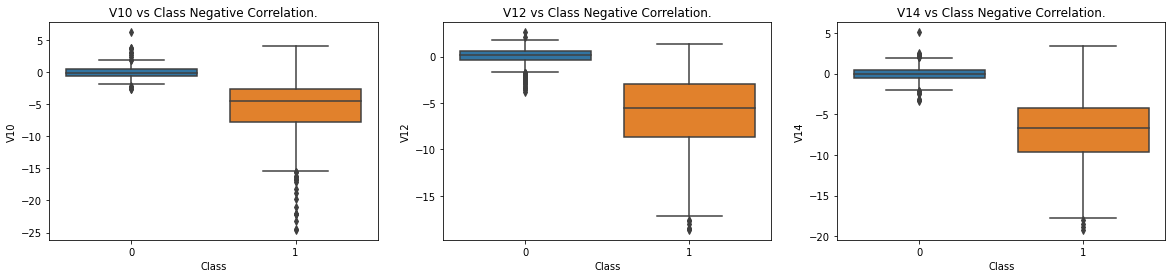

In [27]:
f, axes = plt.subplots(ncols=3,figsize=(20,4))

# Negative correlation with our class.
sns.boxplot(x='Class', y='V10', data = new_df, ax = axes[0])
axes[0].set_title("V10 vs Class Negative Correlation.")

sns.boxplot(x='Class', y='V12', data = new_df, ax = axes[1])
axes[1].set_title("V12 vs Class Negative Correlation.")

sns.boxplot(x='Class', y='V14', data = new_df, ax = axes[2])
axes[2].set_title("V14 vs Class Negative Correlation.")

Text(0.5, 1.0, 'V4 vs Class Positive Correlation')

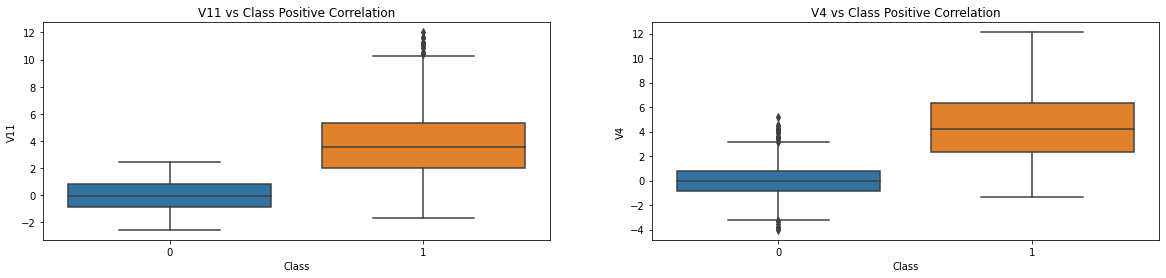

In [28]:
f, axes = plt.subplots(ncols=2,figsize=(20,4))

#Positive correlations (the higher the feature the probability of a fraud transaction increases)
sns.boxplot(x='Class',y='V11',data=new_df, ax = axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df, ax = axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

Look at the distribution of fraud transaction in V10,V12 and V14.

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

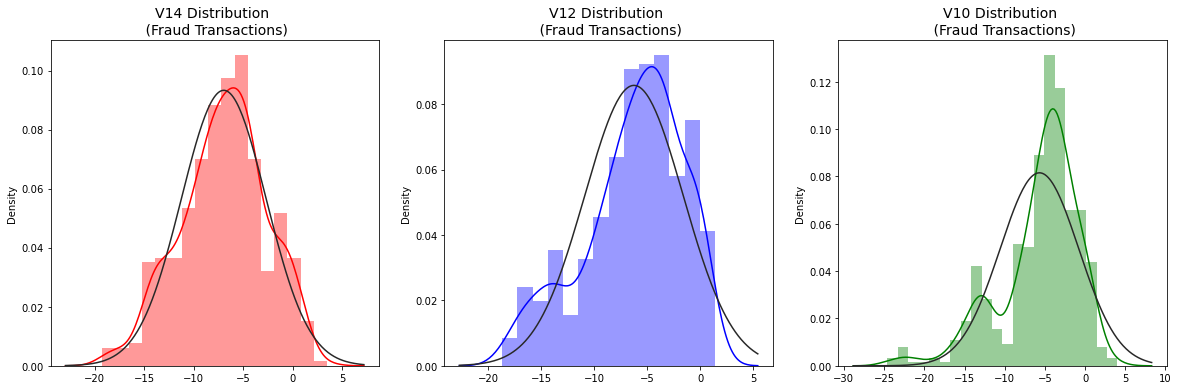

In [29]:
from scipy.stats import norm

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='red')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='blue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='green')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)


# Removing Outliers.

We will use interquatile range to remove the outliers from the highly correlated freatures.

In [30]:
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v14_fraud,25), np.percentile(v14_fraud,75)
print('Quartile 25:{} | Quartile 75: {}'.format(q25,q75))
v14_iqr = q75-q25
print('iqr: {}'.format(v14_iqr))
v14_cut_off = v14_iqr*1.5
v14_lower, v14_upper = q25-v14_cut_off , q75+v14_cut_off
print('Cut off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x<v14_lower or x> v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers: {}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V14']> v14_upper) | (new_df['V14']< v14_lower)].index)
print('----'*44)

#############################################################################################################

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

######################################################################################################################
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))



Quartile 25:-9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers: [-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.0475965708216, -18.6837146333443, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-14.9246547735487, -18.271168

# Dimensionality Reduction Visualization.

We have a data that is high dimensional and visualising any pattern in higher than 3 is not possible so to see how our data would look like we are going to do Dimensionality Reduction techniques for visualization of our data. We are going to use: 1. TSNE 2. PCA 3. TruncatedSVD

In [31]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches
import time

X = new_df.drop('Class',axis=1)
y = new_df['Class']

#TSNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)                      #### Complete this line ####
t1 = time.time()
print("T-SNE took {:.2} s".format(t1-t0))


#PCA implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)                       #### Complete this line ####
t1 = time.time()
print("PCA took {:.2} s".format(t1-t0))

#TruncatedSVD implementation
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)                       #### Complete this line ####
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1-t0))

T-SNE took 3.4 s
PCA took 0.006 s
Truncated SVD took 0.038 s


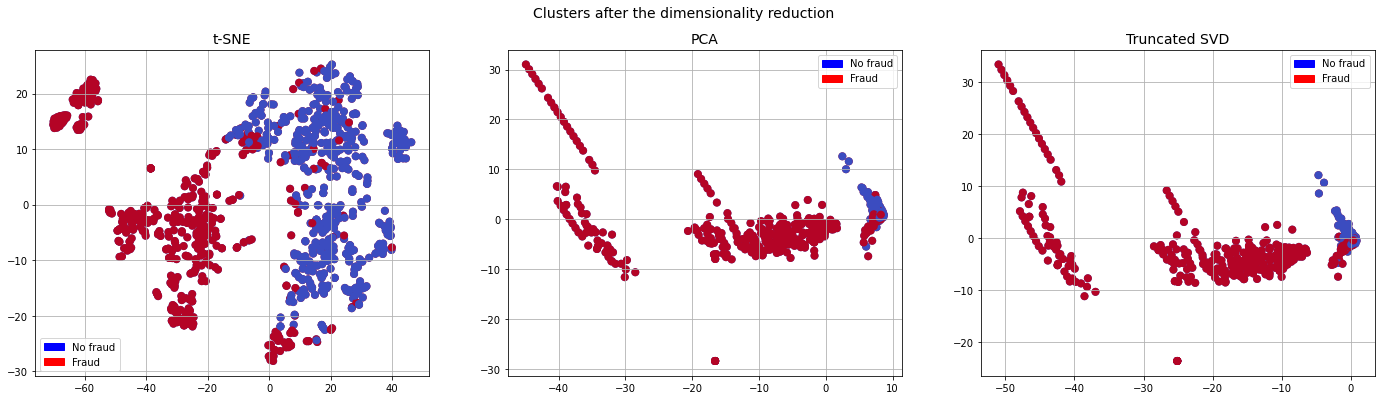

In [32]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,6))
f.suptitle('Clusters after the dimensionality reduction', fontsize=14)

blue_patch = mpatches.Patch(color='blue', label='No fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[0:,0],X_reduced_tsne[0:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths = 2)
ax1.scatter(X_reduced_tsne[0:,0],X_reduced_tsne[0:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])


As we plot the reduced dimension features, we can see there is a decesion boundary for model to learn. It is cleary visible in 2-D projections.

# Implementing Machine Learning Models.

In [33]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# SPLITTING IN TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#converting to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [35]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)
X.columns

X_shapes:
 X_train: X_test:
 (757, 29) (190, 29) 

Y_shapes:
 Y_train: Y_test:
 (757,) (190,)


Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

**Since the problem we have is a Classification Problem, we will apply the classification models and calculate the cross validation score to identify the best fit model for our data**

Some of the models that we are going to use are:
1. Logistic Regression
2. KNeighborsClassifier
3. Support Vector Classifier

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [37]:
Models = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
}

We are going to use sklearn *cross_val_score* to compare model performances, for this we'll see which model has best mean average accuracy over given number of *folds*.

In [38]:
from sklearn.model_selection import cross_val_score


for key, classifier in Models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression has a training score of 94.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 94.0 % accuracy score
Classifier:  SVC has a training score of 93.0 % accuracy score


Logistic Regression appears to be working best for us

**Hyperparameter Search using GridSearch**

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression 
log_reg_params = {
    "penalty": ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']  # lbfgs only supports l2 penalty, so we add solvers that support l1.
}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Best Logistic Regression model
log_reg = grid_log_reg.best_estimator_

# K-Nearest Neighbors
knears_params = {
    "n_neighbors": list(range(2, 5, 1)), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# Best K-Nearest Neighbors model
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {
    'C': [0.5, 0.7, 0.9, 1], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# Best SVC model
svc = grid_svc.best_estimator_


In [40]:
print(log_reg,'\n', knears_neighbors,'\n' ,svc)

LogisticRegression(C=0.01, solver='liblinear') 
 KNeighborsClassifier(n_neighbors=4) 
 SVC(C=0.7, kernel='linear')


**Validation**

Now we have our best set models trained using gridsearch now we move onto testing them on different metrices so as to know which one works best overall for us.

we'll evaluate model using:
* Cross_val_score
* ROC AUC Score
* ROC Curve
* Confusion Matrix, Classification report
* Average precison score, Area under precision recall curve

In [41]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.92%
Knears Neighbors Cross Validation Score 94.32%
Support Vector Classifier Cross Validation Score 93.79%


**SVC** and **Logistic Regression** have the best cross validation score.

Let us also calculate roc_auc_score and also will plot roc_curve.

In [42]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = log_reg.predict(X_test)

knears_pred = knears_neighbors.predict(X_test)

svc_pred = svc.predict(X_test)

In [43]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))


Logistic Regression:  0.9286906218711759
KNears Neighbors:  0.9250750917788407
Support Vector Classifier:  0.9442095894982755


**Plotting**

In [44]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)

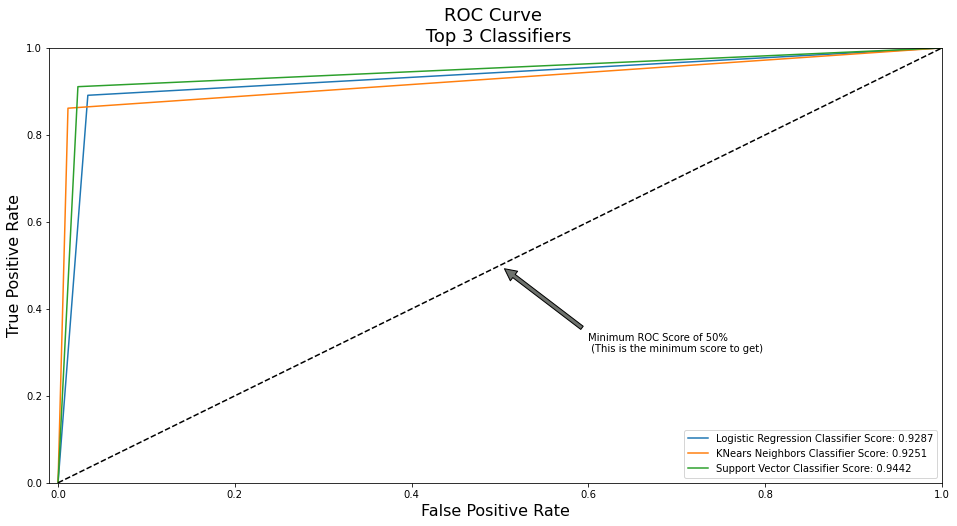

In [45]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

**Logistic Regression has better ROC AUC Score. So, it is the best model till now**

We Now calculate confusion matrix and classification report to do some quantitative evaluation

[Text(0, 0.5, ''), Text(0, 1.5, '')]

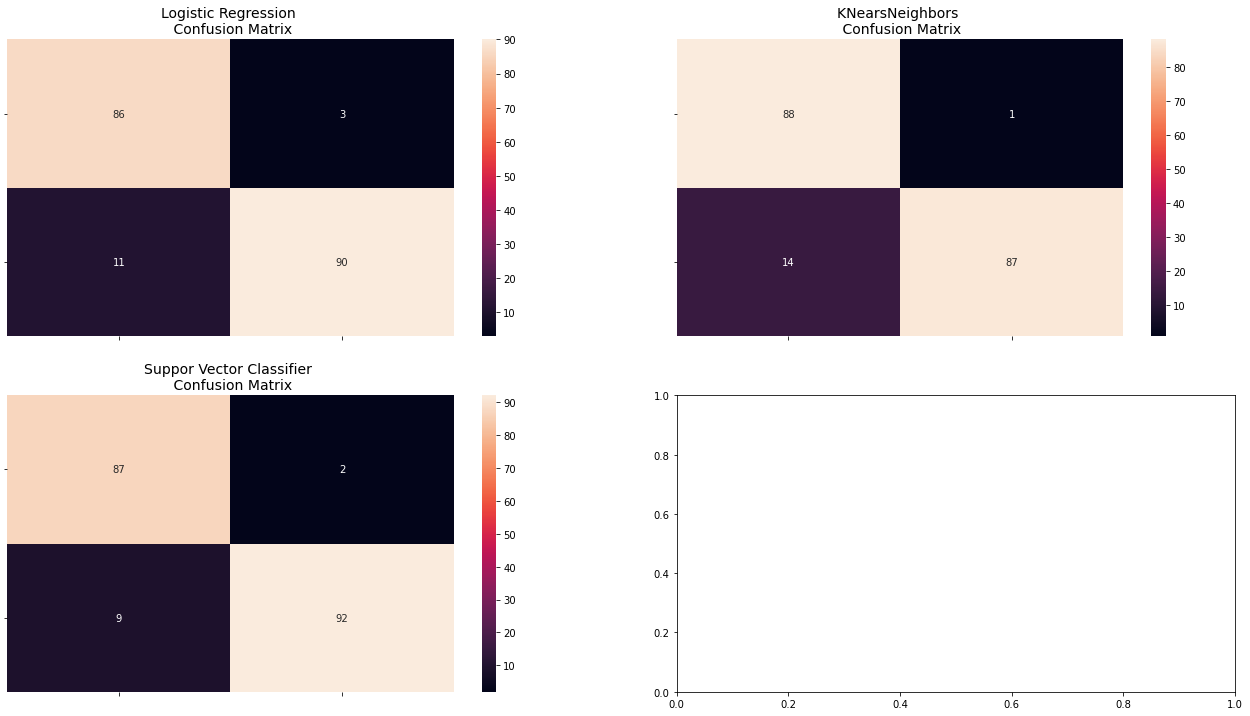

In [46]:
from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots(2,2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [47]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92        89
           1       0.97      0.89      0.93       101

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        89
           1       0.99      0.86      0.92       101

    accuracy                           0.92       190
   macro avg       0.93      0.93      0.92       190
weighted avg       0.93      0.92      0.92       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        89
           1       0.98      0.91      0.94       101

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted

**Here also SVC performs really well**

In [48]:
import sklearn.metrics
lr_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_log_reg)
print(lr_auprc)
kn_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_knear)
print(kn_auprc)
svc_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_svc)
print(svc_auprc)



0.9202390357881289
0.9252818702922924
0.9388788486911401


**Testing**

Now we'll test our models on original test data "Original_Xtest".

In [49]:
org_log_reg_pred = log_reg.predict(original_Xtest)

org_knears_pred = knears_neighbors.predict(original_Xtest)

org_svc_pred = svc.predict(original_Xtest)

In [50]:
org_log_reg_cf = confusion_matrix(original_ytest, org_log_reg_pred)
org_kneighbors_cf = confusion_matrix(original_ytest, org_knears_pred)
org_svc_cf = confusion_matrix(original_ytest, org_svc_pred)

print(org_log_reg_cf, '\n', org_kneighbors_cf, '\n', org_svc_cf)

[[54647  2214]
 [    9    89]] 
 [[56108   753]
 [   11    87]] 
 [[54835  2026]
 [    9    89]]


Logistic Regression has least false negative as expected for fraud class.

In [51]:
print('Logistic Regression:')
print(classification_report(original_ytest, org_log_reg_pred))

print('KNears Neighbors:')
print(classification_report(original_ytest, org_knears_pred))

print('Support Vector Classifier:')
print(classification_report(original_ytest, org_svc_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56959
   macro avg       0.52      0.93      0.53     56959
weighted avg       1.00      0.96      0.98     56959

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.10      0.89      0.19        98

    accuracy                           0.99     56959
   macro avg       0.55      0.94      0.59     56959
weighted avg       1.00      0.99      0.99     56959

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.04      0.91      0.08        98

    accuracy                           0.96     56959
   macro avg       0.52      0.94      0.53     56959
weighted

In [52]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


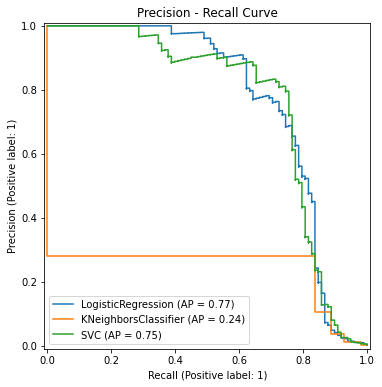

In [53]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot precision-recall curves
PrecisionRecallDisplay.from_estimator(log_reg, original_Xtest, original_ytest, ax=ax)
PrecisionRecallDisplay.from_estimator(knears_neighbors, original_Xtest, original_ytest, ax=ax)
PrecisionRecallDisplay.from_estimator(svc, original_Xtest, original_ytest, ax=ax)

ax.set_title('Precision - Recall Curve')
plt.show()


In [54]:
sklearn.__version__

'1.5.2'

In [55]:
org_lr_auprc = sklearn.metrics.average_precision_score(original_ytest,org_log_reg_pred)
org_lr_auprc

0.035254200581425886